# 0. 기본 정보
* 코드 작성자: 문예준, 배은성, 여서연, 이상원
* 코드 작성일: 2024-04-05 ~ 2024-04-06
* 데이터 분석 목적: 연구 주제에 따른 가설 검정 등
* 데이터 출처: [Diabetes Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# 1. 기초 설정

In [ ]:
!pip install koreanize_matplotlib

In [ ]:
# 사용한 라이브러리

import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 열 중간 잘리지 않게 설정

pd.set_option('display.max_columns', None)

In [ ]:
# 데이터 불러오기

data_origin = pd.read_csv('https://drive.google.com/uc?export=download&id=19BgY3-hIHNykXKNNSmDs9ZeSxvZdGmsZ')
data = data_origin.copy()

**데이터 설명**
---
이 데이터셋은 국립 당뇨병 및 소화기 및 신장 질병 연구소에서 제공한 것입니다. <br/>
이 데이터셋의 목적은 환자의 당뇨병 여부를 진단적으로 예측하는 것인데,
데이터셋에 포함된 특정 진단 측정값을 기반으로 당뇨병 여부를 진단적으로 예측하는 것입니다. <br/>
이러한 인스턴스를 선택하는 데 몇 가지 제약이 있었습니다. <br/>
여기서의 모든 환자는 여성이며 최소 21세 이상의 피마 인디언 혈통을 가진 여성입니다.

# 2. 데이터 특성 파악 및 전처리

## 2-1. 기본 특성

In [ ]:
# 출력 예시 확인
data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
534,1,77,56,30,56,33.3,1.251,24,0
45,0,180,66,39,0,42.0,1.893,25,1
427,1,181,64,30,180,34.1,0.328,38,1
188,8,109,76,39,114,27.9,0.640,31,1
179,5,130,82,0,0,39.1,0.956,37,1
12,10,139,80,0,0,27.1,1.441,57,0
491,2,89,90,30,0,33.5,0.292,42,0
257,2,114,68,22,0,28.7,0.092,25,0
659,3,80,82,31,70,34.2,1.292,27,1
603,7,150,78,29,126,35.2,0.692,54,1


In [ ]:
# 컬럼 리스트
data_cols = list(data.columns)
data_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

**컬럼 설명**
---
* Pregnancies : 임신횟수
* Glucose : 내당능 검사에서 2시간 후의 혈장 포도당 농도
* Bloodpressure : 혈압
* skinThickness : 삼두근 피부 두께
* insulin : 2시간 혈청 인슐린
* BMI : BMI
* DiabetesPedigreeFunction : 당뇨병 혈통 함수
* age : 나이
* outcome: 0 = 건강(Negative), 1은 당뇨(Positive)

In [ ]:
# 변수 타입
data_types = data.dtypes
qual_vari = data_types[data_types == 'object'].index.tolist()
quant_vari = data_types[data_types != 'object'].index.tolist()

print("질적 변수:", qual_vari)
print()
print("양적 변수:", quant_vari)

질적 변수: []

양적 변수: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


## 2-2. 질적 변수

## 2-3. 결측치

In [ ]:
# 결측치 수와 비율 계산
missing_count = data.isnull().sum()
missing_ratio = round(missing_count / len(data) * 100, 2)

# 결측치 수와 비율 출력
missing_info = pd.concat([missing_count, missing_ratio], axis=1, keys=['결측치 수', '결측치 비율 (%)'])
print(missing_info)

                          결측치 수  결측치 비율 (%)
Pregnancies                   0         0.0
Glucose                       0         0.0
BloodPressure                 0         0.0
SkinThickness                 0         0.0
Insulin                       0         0.0
BMI                           0         0.0
DiabetesPedigreeFunction      0         0.0
Age                           0         0.0
Outcome                       0         0.0


In [ ]:
# 기술통계량
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


글루코스, 인슐린, bmi, 혈압, 피부두께에서 0값 처리가 가장 큰 관건 <br/>
컬럼수가 많지 않기 때문에 그 행을 모두 제거하는 것은 옳지 않음

In [ ]:
'''knn 알고리즘 적용이 가능하면 실시할 것
# 0값을 결측치로 간주
col = ['BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Glucose','Age']
data[col]=data[col].replace(0, np.nan)'''

"knn 알고리즘 적용이 가능하면 실시할 것\n# 0값을 결측치로 간주\ncol = ['BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Glucose','Age']\ndata[col]=data[col].replace(0, np.nan)"

In [ ]:
'''# 결측치 수와 비율 계산
missing_count = data.isnull().sum()
missing_ratio = round(missing_count / len(data) * 100, 2)

# 결측치 수와 비율 출력
missing_info = pd.concat([missing_count, missing_ratio], axis=1, keys=['결측치 수', '결측치 비율 (%)'])
print(missing_info)'''

"# 결측치 수와 비율 계산\nmissing_count = data.isnull().sum()\nmissing_ratio = round(missing_count / len(data) * 100, 2)\n\n# 결측치 수와 비율 출력\nmissing_info = pd.concat([missing_count, missing_ratio], axis=1, keys=['결측치 수', '결측치 비율 (%)'])\nprint(missing_info)"

혈압,글루코스,bmi는 결측률이 적은 반면, 피부두께와 인슐린은 매우 높아서 신중하게 처리해야할듯

In [ ]:
'''df_small = data[col]
df_corr = df_small.corr()
df_corr'''

'df_small = data[col]\ndf_corr = df_small.corr()\ndf_corr'

연속형 변수끼리 상관관계를 계산해 보았을때 혈압은 나이, 피부두께는 bmi, 인슐린은 글루코스(포도당)과 관련이 있음을 알 수 있었는데 이를 바탕으로 결측치를 처리하는게 좋을 것 같다.<br/>
머신러닝에서 상관성 높은 변수를 참고하여 결측치를 대체하는 것(=knn알고리즘)이 있는 것 같은데 참고하면 좋을 것 같음

In [ ]:
'''# 결측률이 적은 것은 평균으로 대체 - bmi와 글루코스
data['Glucose']=data.Glucose.fillna(data.Glucose.mean())
data['BMI']=data.BMI.fillna(data.BMI.mean())
data[data.Glucose.isna()]'''

"# 결측률이 적은 것은 평균으로 대체 - bmi와 글루코스\ndata['Glucose']=data.Glucose.fillna(data.Glucose.mean())\ndata['BMI']=data.BMI.fillna(data.BMI.mean())\ndata[data.Glucose.isna()]"

## 2-4. 양적변수

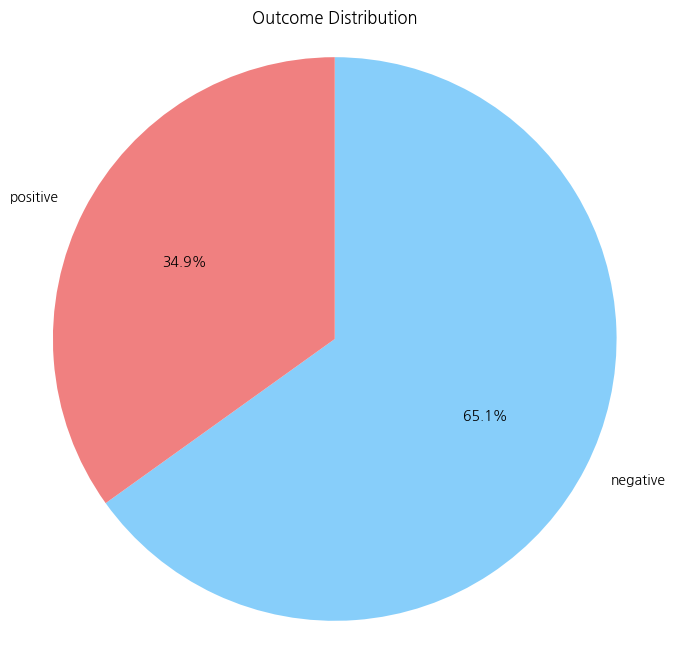

In [ ]:
# Outcome 별 개수 계산
outcome_counts = data['Outcome'].value_counts()

# 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(outcome_counts, autopct='%1.1f%%', startangle=90, counterclock=False
        , colors=['lightskyblue', 'lightcoral'], labels=['negative', 'positive'])
plt.title('Outcome Distribution')
plt.axis('equal')
plt.show()

(array([300., 157.,  92.,  86.,  52.,  34.,  26.,  16.,   4.,   1.]),
 array([21., 27., 33., 39., 45., 51., 57., 63., 69., 75., 81.]),
 <BarContainer object of 10 artists>)

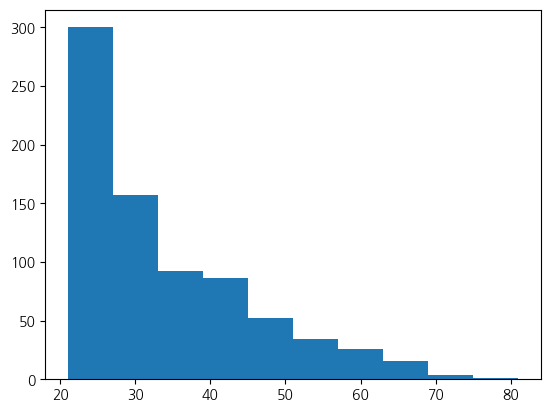

In [ ]:
plt.hist('Age', data = data)

조사한 주 연령층은 20대로 고르게 조사한 것 같지는 않다. <br/>20대가 많은 만큼 20대 당뇨에 대해 깊이있게 분석해보면 좋을것 같다.

In [ ]:
# Outcome이 0 또는 1인 경우를 각각 구분하여 데이터 추출
df_negative = data[data['Outcome'] == 0]
df_positive = data[data['Outcome'] == 1]

In [ ]:
# 컬럼별 당뇨 진단 여부 히스토그램 시각화 함수
def Histogram(column):
  plt.figure(figsize=(10, 6))
  sns.distplot(df_negative[column], color='blue', label='Negative', hist_kws={'alpha': 0.5})
  sns.distplot(df_positive[column], color='red', label='Positive', hist_kws={'alpha': 0.5})
  plt.title(f'Distribution of {column} by Outcome')
  plt.xlabel(column)
  plt.ylabel('Density')
  plt.legend()
  plt.show()

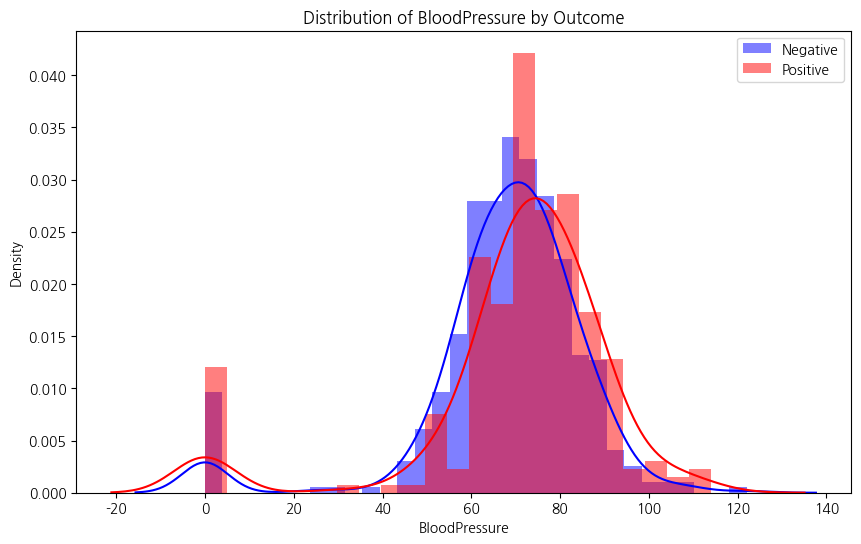

In [ ]:
# 혈압
Histogram('BloodPressure')

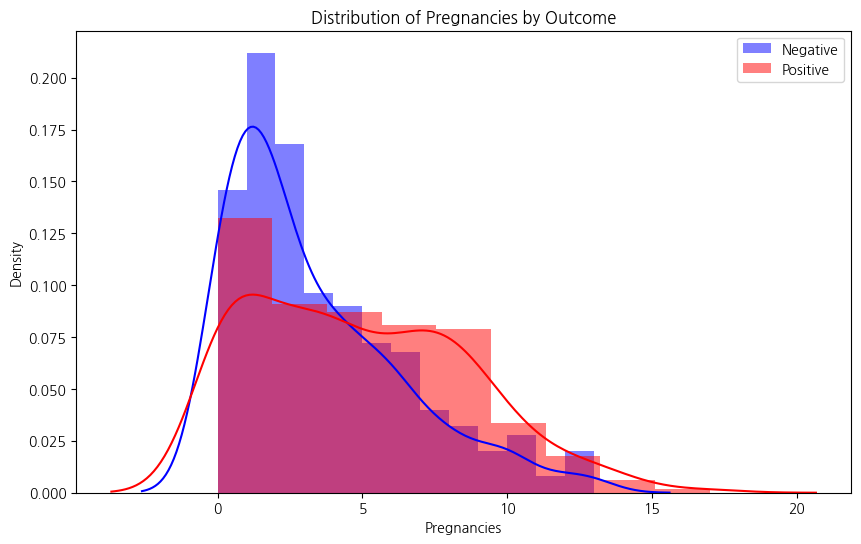

In [ ]:
# 임신횟수
Histogram('Pregnancies')

임신 중기와 후기에는 정상적으로 인슐린 저항성이 증가하는데, 이는 인슐린 작용 효과가 감소한다는 것을 의미합니다. 임신 후기에는 인슐린 작용이 임신 전보다 50 - 70% 감소해, 인슐린 요구량이 임신 전보다 2~3배 증가합니다. 인슐린 저항성은 임신 중 태반에서 생성되는 젖샘자극호르몬, 코르티솔, 프로게스테론, 프로락틴 등의 호르몬 농도 변화, 그리고 임신 중 체지방의 증가와 관계가 있습니다. 정상적으로는 임신 때 증가하는 인슐린 요구량에 맞춰 췌장에서 더 많은 인슐린이 분비되므로 혈당 조절 능력이 나빠지지 않지만, 임신당뇨병이 발생하는 산모는 인슐린 분비가 충분히 증가하지 않아 혈당이 상승합니다.
https://health.kdca.go.kr/healthinfo/biz/health/gnrlzHealthInfo/gnrlzHealthInfo/gnrlzHealthInfoView.do?cntnts_sn=5271

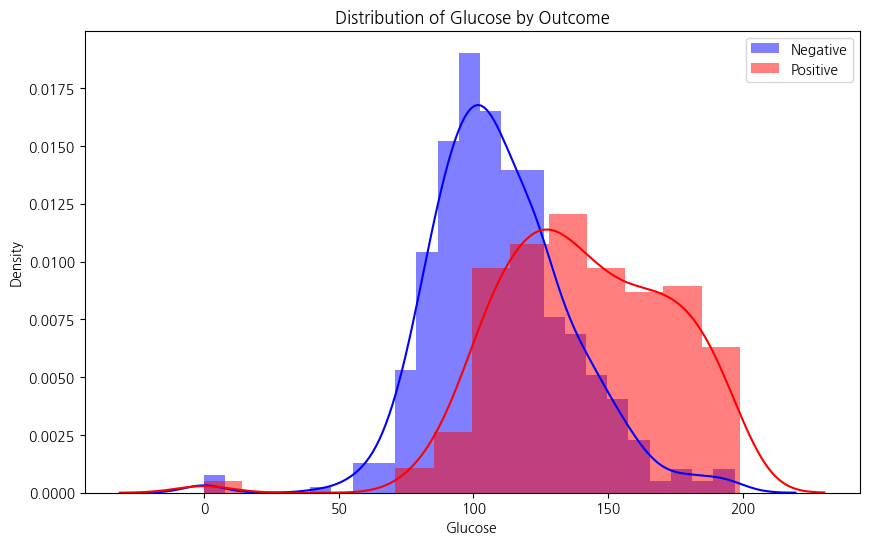

In [ ]:
# 글루코스
Histogram('Glucose')

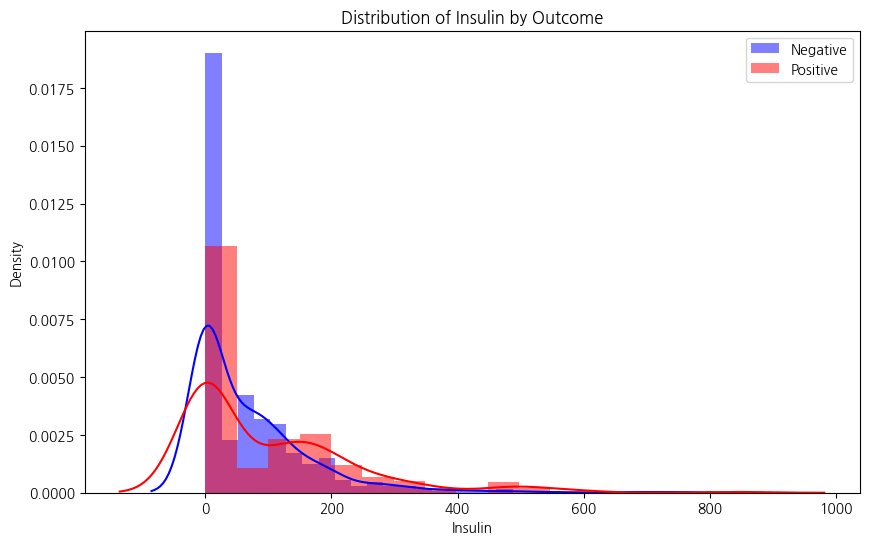

In [ ]:
# 인슐린
Histogram('Insulin')

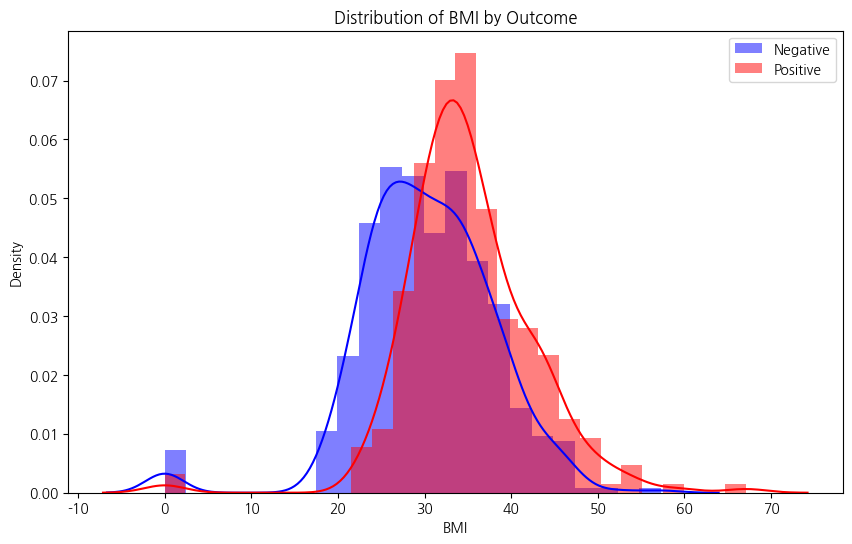

In [ ]:
# BMI
Histogram('BMI')

## 2-5. 정규성 검정

In [ ]:
# 표본 크기가 2000 이하이므로 샤피로-윌크 검정 수행
for column in quant_vari:
    print(f"변수 '{column}'의 정규성 검정 결과:")

    # 샤피로-윌크 검정
    shapiro_stat, shapiro_p = stats.shapiro(data[column])
    print(f"샤피로윌크스 검정 - 통계량(statistic): {shapiro_stat:.4f}, p-value={shapiro_p:.4f}")

변수 'Pregnancies'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9043, p-value=0.0000
변수 'Glucose'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9701, p-value=0.0000
변수 'BloodPressure'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.8189, p-value=0.0000
변수 'SkinThickness'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9046, p-value=0.0000
변수 'Insulin'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.7220, p-value=0.0000
변수 'BMI'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9500, p-value=0.0000
변수 'DiabetesPedigreeFunction'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.8365, p-value=0.0000
변수 'Age'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.8748, p-value=0.0000
변수 'Outcome'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.6025, p-value=0.0000


**추후 비모수 검정 방법을 실시하는 것이 적절하다고 판단함**

## 2-6. 이상치 점검

### (1) 함수 설정
**GetOutlier**: IQR을 통해 이상치를 추출<br>
* df: csv파일 등에서 불러온 데이터 프레임<br>
* col: 사용하고자 하는 <u>수치형</u> 컬럼 이름<br>
* weight: 가중치, 기본값은 1.5

In [ ]:
def GetOutlier(df, col, weight=1.5):
    outlier_list = []
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    for i in df[col]:
        if i > Q3 + weight*IQR :
            outlier_list.append(i)
        if i < Q1 - weight*IQR :
            outlier_list.append(i)

    cnt_outlier = len(outlier_list)
    uniq_outlier = list(set(outlier_list)) #고유값만 출력

    if len(outlier_list) == 0:
        print(col, '이상치 없음')

    else:
        print(col, '이상치:', np.sort(uniq_outlier))

### (2) 이상치 시각화

In [ ]:
# list 형식
for numeric in quant_vari:
    GetOutlier(data, numeric)

Pregnancies 이상치: [14 15 17]
Glucose 이상치: [0]
BloodPressure 이상치: [  0  24  30 108 110 114 122]
SkinThickness 이상치: [99]
Insulin 이상치: [321 325 326 328 330 335 342 360 370 375 387 392 402 415 440 465 474 478
 480 485 495 510 540 543 545 579 600 680 744 846]
BMI 이상치: [ 0.  52.3 52.9 53.2 55.  57.3 59.4 67.1]
DiabetesPedigreeFunction 이상치: [1.213 1.222 1.224 1.251 1.258 1.268 1.282 1.292 1.318 1.321 1.353 1.39
 1.391 1.394 1.4   1.441 1.461 1.476 1.6   1.698 1.699 1.731 1.781 1.893
 2.137 2.288 2.329 2.42 ]
Age 이상치: [67 68 69 70 72 81]
Outcome 이상치 없음


In [ ]:
# subplot 행렬 차원 계산
target_cols = quant_vari[:-1]
box_lists = len(target_cols)
box_rows = int(box_lists ** 0.5)  # 제곱근을 정수로 변환하여 가장 가까운 값으로 설정
box_cols = (box_lists + box_rows - 1) // box_rows  # 가장 가까운 값을 사용하여 열 개수 계산

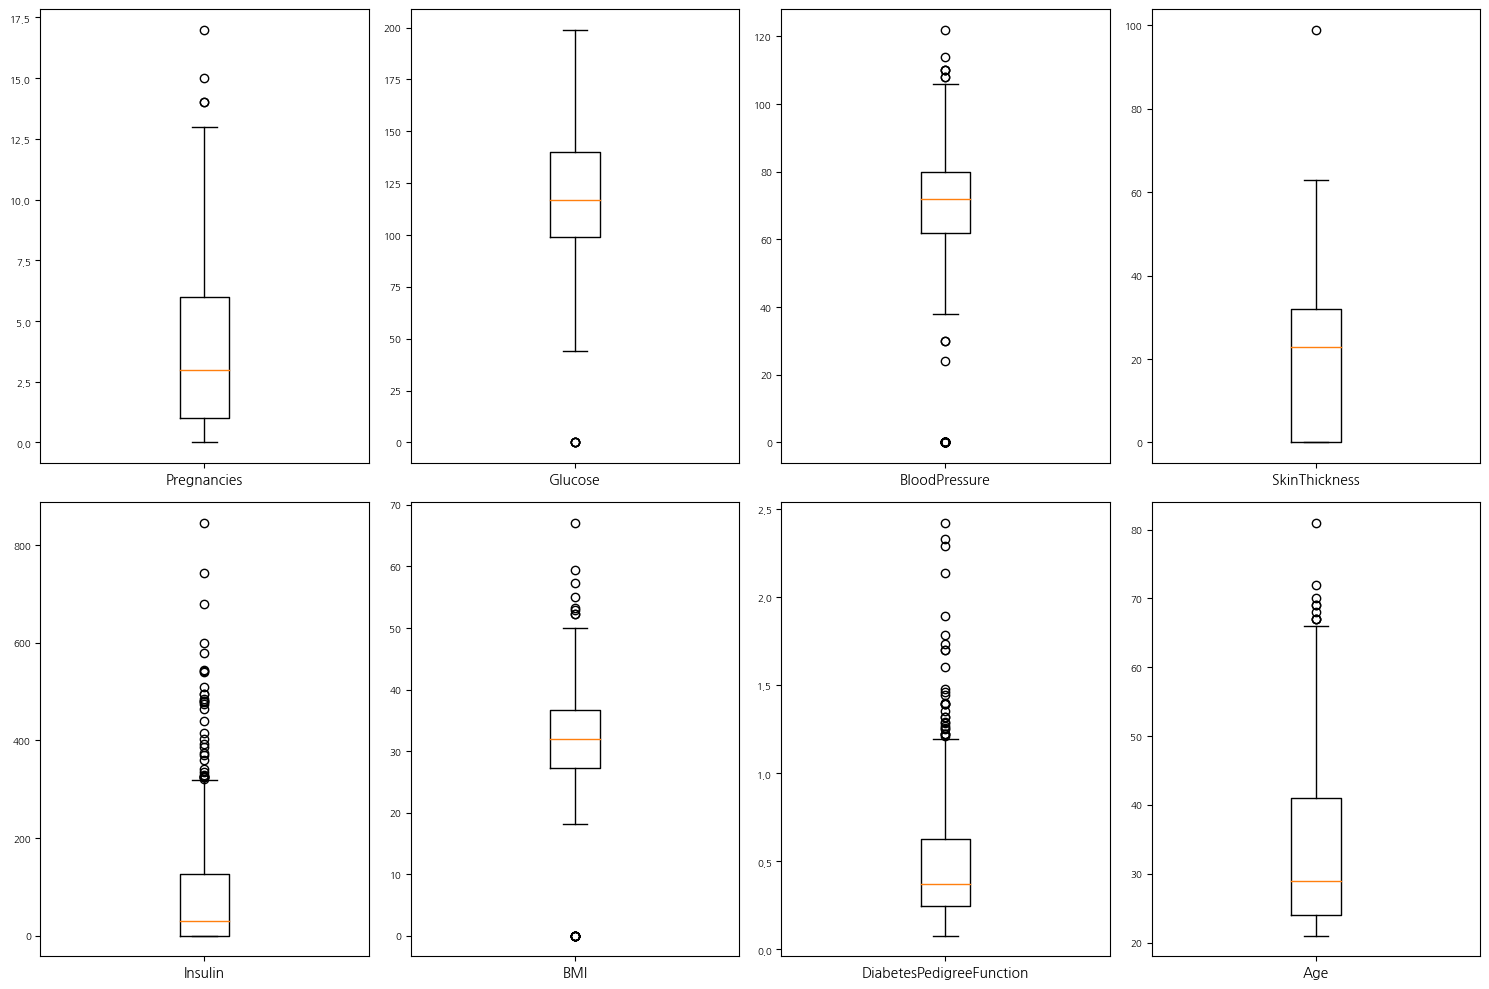

In [ ]:
# Boxplot 형식
fig, axes = plt.subplots(box_rows, box_cols, figsize=(15, 10))

for i, col in enumerate(target_cols):
    row_idx = i // box_cols
    col_idx = i % box_cols

    ax = axes[row_idx, col_idx] if box_rows > 1 else axes[col_idx]
    ax.boxplot(data[col])
    ax.set_xticklabels([col], fontsize=10)
    ax.set_xlabel('')
    ax.tick_params(axis='y', labelsize=7)

plt.tight_layout()
plt.show()

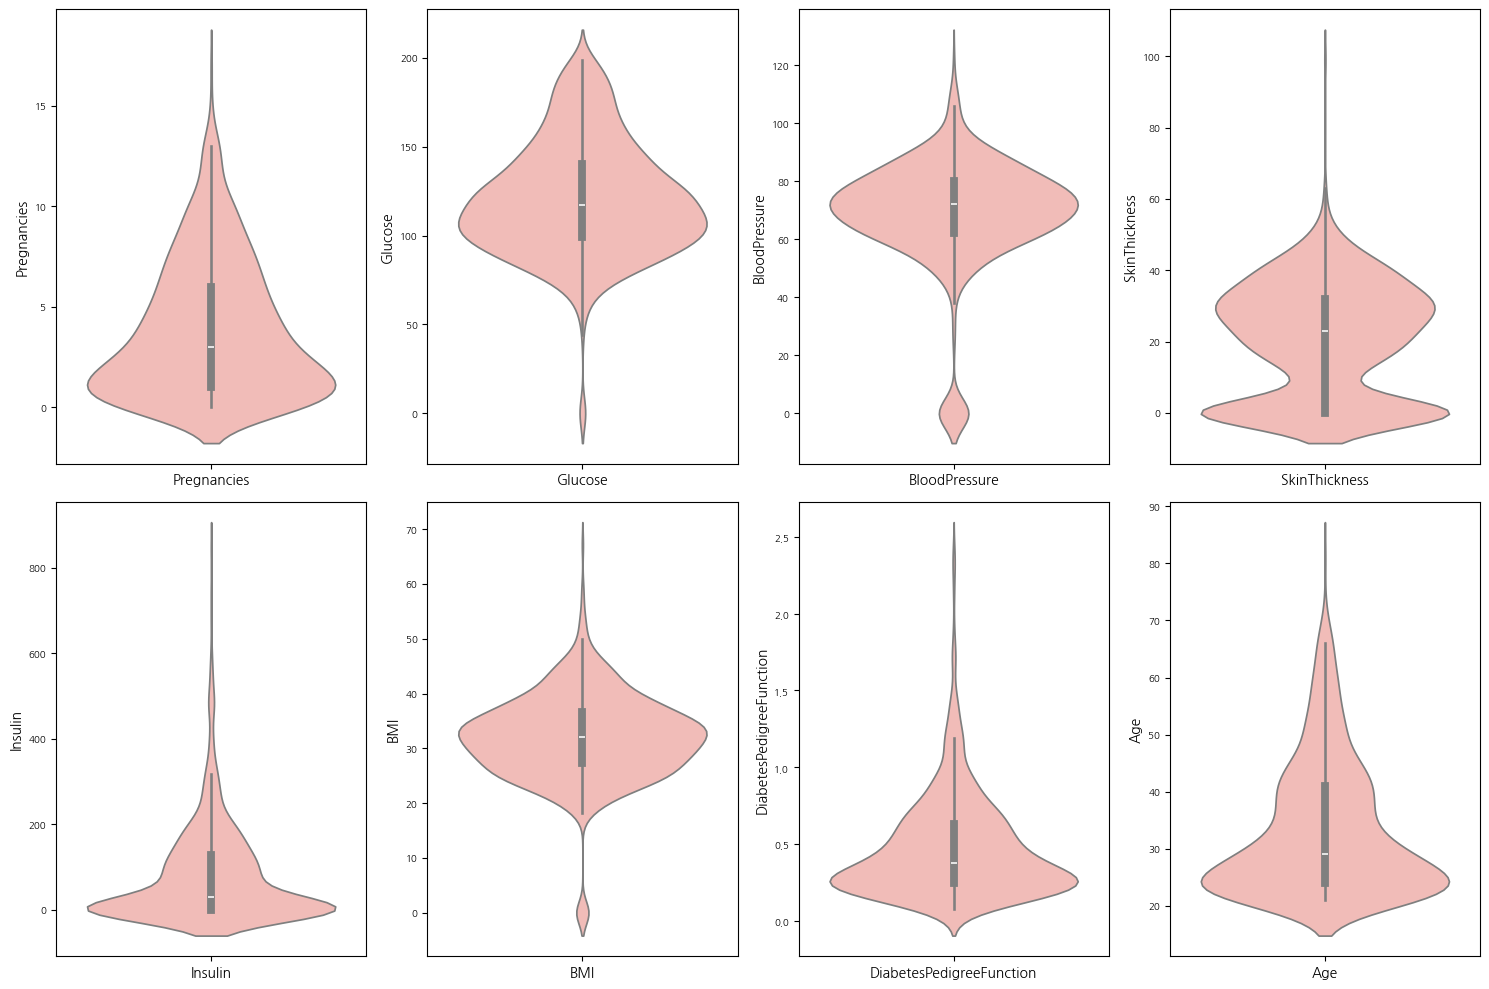

In [ ]:
# Violinplot 형식
fig, axes = plt.subplots(box_rows, box_cols, figsize=(15, 10)) #boxplot와 동일한 대상

for i, col in enumerate(target_cols):
    row_idx = i // box_cols
    col_idx = i % box_cols

    ax = axes[row_idx, col_idx] if box_rows > 1 else axes[col_idx]
    sns.violinplot(data=data[col], palette='Pastel1', ax=ax)
    ax.set_xticks([0])  # 바이올린 플롯의 x 축 라벨 설정
    ax.set_xticklabels([col], fontsize=10)
    ax.tick_params(axis='y', labelsize=7)

plt.tight_layout()
plt.show()

# 3. 가설 검증 및 연구

## 3-1. 가설 또는 시각화 주제 설정
---
1. 각 변수별 진단률
2. 당뇨 진단 여부에 따라 혈통 함수에 차이가 생긴다. (맨-휘트니 U 검정)
3. 당뇨 진단 여부에 따라 BMI 일반군/위험군의 비율이 달라진다. (카이제곱 독립성 검정)
4. 각 요인에 따른 당뇨 여부 예측 모델링 (로지스틱 회귀)

## 3-2. 가설 검증 또는 시각화 실행

### 각 변수별 진단률

In [ ]:
def Barplot(column):
  plt.figure(figsize=(12,6))
  sns.barplot(x=column, y = 'Outcome', data=data)

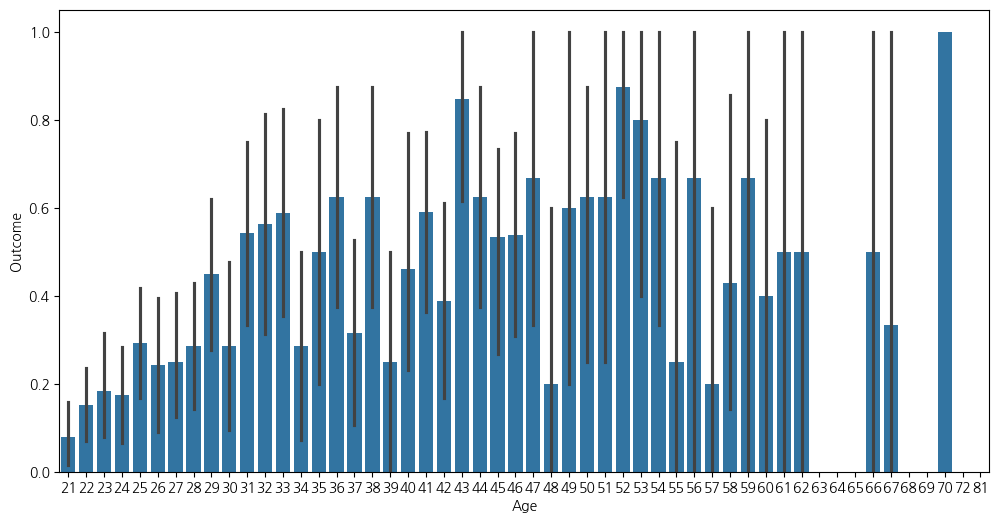

In [ ]:
# 연령
Barplot('Age')

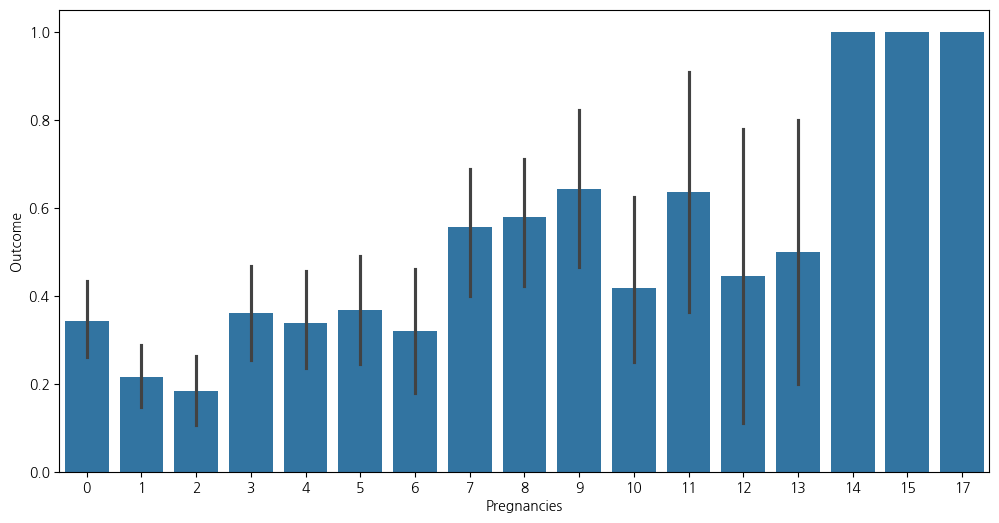

In [ ]:
# 임신횟수
Barplot('Pregnancies')

**▶ 횟수가 많을수록 당뇨병 발병률이 높음**

### 당뇨 진단 여부에 따라 혈통 함수에 차이가 생긴다.
---
맨-휘트니 U 검정 실시

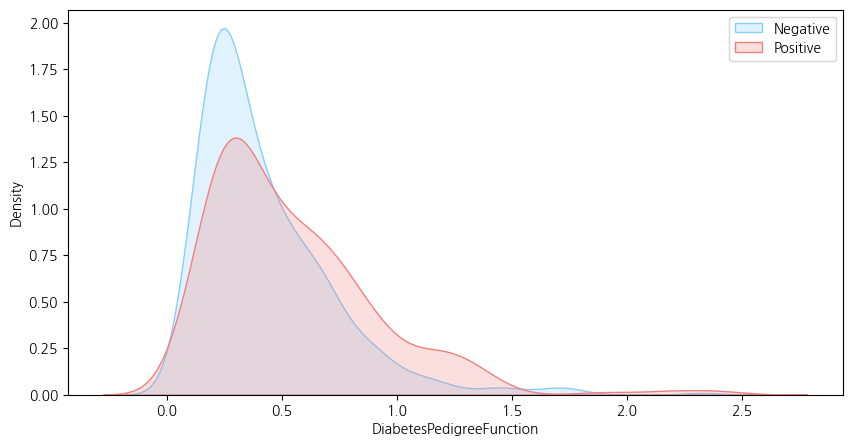

In [ ]:
# 커널 밀도 추정 그래프
plt.figure(figsize=(10, 5))
sns.kdeplot(df_negative['DiabetesPedigreeFunction'], label="Negative", color='lightskyblue', shade=True)
sns.kdeplot(df_positive['DiabetesPedigreeFunction'], label="Positive", color='lightcoral', shade=True)
plt.legend()
plt.show()

In [ ]:
# 맨-휘트니 U 검정 수행
from scipy.stats import mannwhitneyu
u_statistic, p_value = mannwhitneyu(df_negative['DiabetesPedigreeFunction'], df_positive['DiabetesPedigreeFunction'])

# 검정 결과 출력
print(f"U statistic: {u_statistic}")
print(f"P-value: {'%.4f'%p_value}")

U statistic: 52769.0
P-value: 0.0000


### 당뇨 진단 여부에 따라 BMI 일반군/위험군의 비율이 달라진다.
---
카이제곱 독립성 검정 실시

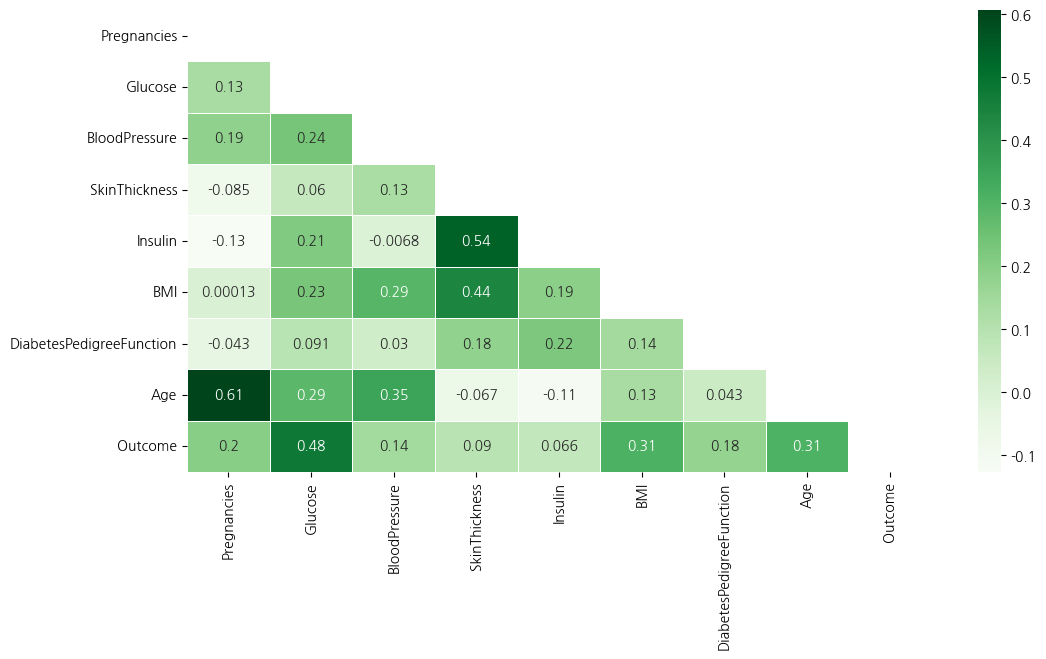

In [ ]:
# 상관관계 히트맵(비모수검정)
plt.figure(figsize=(12, 6))
data_corr = data.corr(method='spearman')
mask = np.triu(np.ones_like(data_corr))
sns.heatmap(data_corr, annot=True, cmap='Greens', mask=mask, linewidths=0.5)
plt.show()

* Age - Pregnancies(0.61): 나이를 먹으면 임신 횟수도 자연히 늘어날 것
* Outcome - Glucose(0.48): 혈중 glucose 농도로 당뇨를 진단하므로 당연한 결과임
* SkinThickness - BMI(0.44): BMI는 체중으로 계산하므로, 피하지방이 두꺼울수록 자연히 증가할 것
---
* SkinThickness - Insulin(0.54): 바로 생각나는 관련성이 없으므로 분석 대상으로 고려해볼 만하다고 판단 / 단, 강한 상관관계는 아님

Text(0.5, 1.0, 'reg between SkinThickness & Insulin')

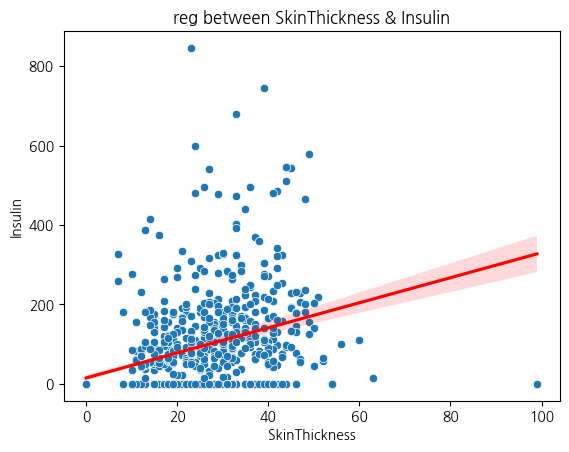

In [ ]:
# '삼두근피부두께' & '인슐린' 0.54
sns.scatterplot(x='SkinThickness', y='Insulin', data=data)
sns.regplot(x='SkinThickness', y='Insulin', data=data, scatter=False, color='red')
plt.title('reg between SkinThickness & Insulin')

In [ ]:
# Levene의 등분산성 검정(비모수 추천)
pos_bmi = data[data['Outcome']==1]['BMI']
pos_bmi = data[data['Outcome']==0]['BMI']

_, p_value = stats.levene(pos_bmi, pos_bmi, center='median') #비모수에서는 median이 더 강력

if p_value > 0.05:
    equal_var = True
    print("등분산성을 만족합니다.")
else:
    equal_var = False
    print("등분산성을 만족하지 않습니다.")

등분산성을 만족합니다.


In [ ]:
# BMI 수치에 따른 인원수
others_bmi = (data['BMI'] < 20).sum()
print(f'{others_bmi}명 \t BMI 20 미만')

normal_bmi = ((data['BMI'] < 25) & (data['BMI'] >= 20)).sum()
print(f'{normal_bmi}명 \t 정상')

over_bmi = ((data['BMI'] < 30) & (data['BMI'] >= 25)).sum()
print(f'{over_bmi}명 \t 과체중 (1도비만)')

obesity_bmi = ((data['BMI'] < 40) & (data['BMI'] >= 30)).sum()
print(f'{obesity_bmi}명 \t 비만 (2도비만)')

severeOvesity_bmi = (data['BMI'] >= 40).sum()
print(f'{severeOvesity_bmi}명 \t 고도비만')

24명 	 BMI 20 미만
93명 	 정상
179명 	 과체중 (1도비만)
374명 	 비만 (2도비만)
98명 	 고도비만


In [ ]:
# BMI수치 30을 기준으로 일반군/위험군 구분
dia_bmi = data.copy()
dia_bmi['BMI_danger'] = dia_bmi['BMI'].apply(lambda x: 1 if x >= 30 else 0) #일반군=0, 위험군=1

# 분할표 출력
grouped_data = dia_bmi.groupby('BMI_danger')['Outcome'].value_counts().unstack()
grouped_data

Outcome,0,1
BMI_danger,,
0,247,49
1,253,219


In [ ]:
# 카이제곱 독립성 검정 수행
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(grouped_data)

# 검정 결과 출력
print('Chi-square statistic:', chi2)
print('p-value:', '%.4f'%p)

Chi-square statistic: 70.01243027191117
p-value: 0.0000


p-value=0.0000으로 유의수준 5% 하에서 **귀무가설을 기각**할 수 있다. <br/>
따라서 **당뇨 진단 여부에 따른 BMI 일반군과 위험군  비율에는 유의미한 차이가 있다**고 말할 수 있다.

### 각 요인에 따른 당뇨 여부 예측 모델링 (로지스틱 회귀)

### 다변수 로지스틱 회귀분석 시행

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *

# 독립 변수와 종속 변수
X = data.iloc[:, :-1]
y = data['Outcome']

In [ ]:
print(X.shape,y.shape)

(768, 8) (768,)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [ ]:
lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)

In [ ]:
def get_clf_eval(y_test=None, pred=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
get_clf_eval(y_test,pred)

오차 행렬
[[85 15]
 [27 27]]
정확도: 0.7273, 정밀도: 0.6429, 재현율: 0.5000,    F1: 0.5625, AUC:0.6750


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       100
           1       0.64      0.50      0.56        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.72      0.73      0.72       154

